In [2]:
pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load the dataset
df = pd.read_csv(r'C:/Users/user/downloads/share-healthy-diet-unaffordable.csv')

# Step 2: Overview of the dataset
print(df.head())  # To see the first few rows of the dataset


    Entity Code  Year  \
0  Albania  ALB  2017   
1  Albania  ALB  2018   
2  Albania  ALB  2019   
3  Albania  ALB  2020   
4  Albania  ALB  2021   

   Share of the population who cannot afford a healthy diet  
0                                               31.3         
1                                               23.0         
2                                               22.2         
3                                               19.9         
4                                               15.9         


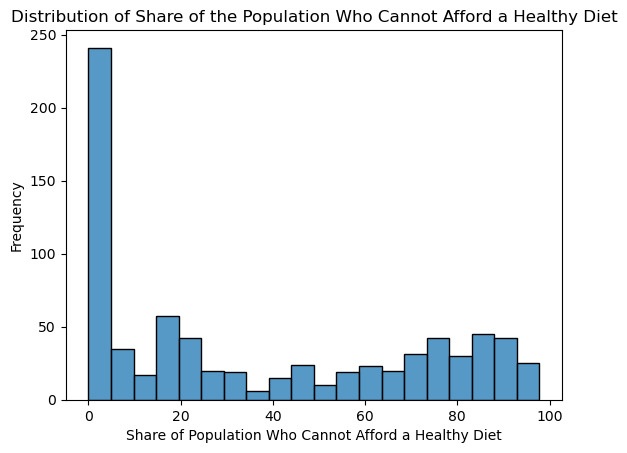

In [5]:
sns.histplot(data=df, x="Share of the population who cannot afford a healthy diet", bins=20)
plt.xlabel("Share of Population Who Cannot Afford a Healthy Diet")
plt.ylabel("Frequency")
plt.title("Distribution of Share of the Population Who Cannot Afford a Healthy Diet")
plt.show()

In [10]:
yearly_mean = df.groupby('Year')["Share of the population who cannot afford a healthy diet"].mean()


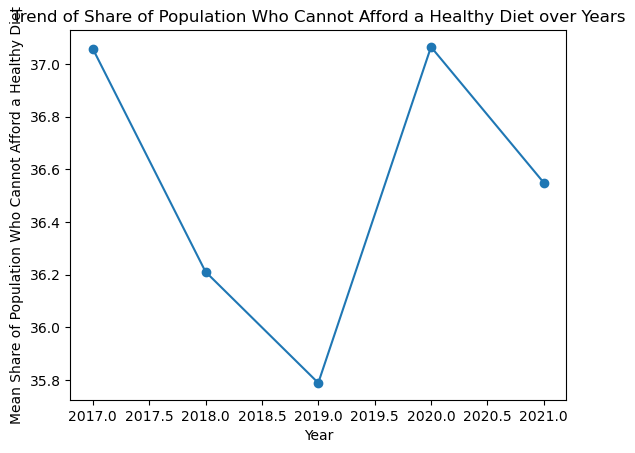

In [11]:
yearly_mean.plot(kind="line", marker="o")
plt.xlabel("Year")
plt.ylabel("Mean Share of Population Who Cannot Afford a Healthy Diet")
plt.title("Trend of Share of Population Who Cannot Afford a Healthy Diet over Years")
plt.show()

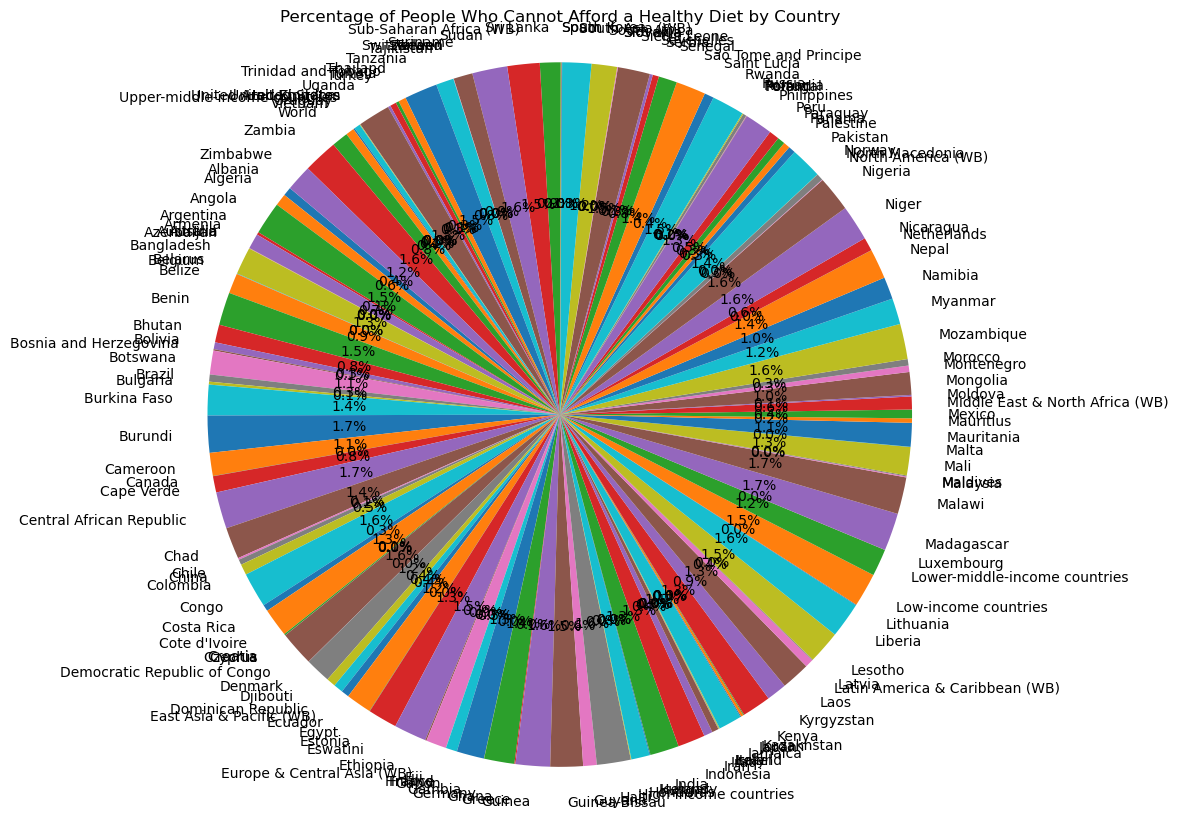

In [20]:
country_mean = df.groupby('Entity')["Share of the population who cannot afford a healthy diet"].mean()

# Step 3: Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(country_mean, labels=country_mean.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title("Percentage of People Who Cannot Afford a Healthy Diet by Country")
plt.show()
 

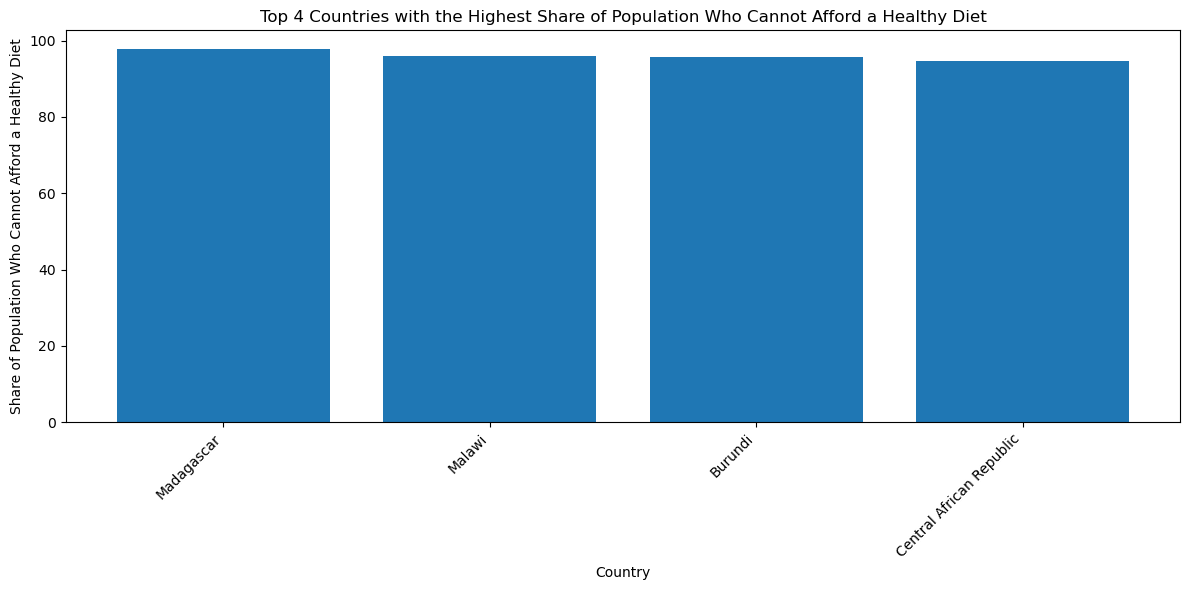

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries["Entity"], top_10_countries["Share of the population who cannot afford a healthy diet"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Share of Population Who Cannot Afford a Healthy Diet")
plt.title("Top 4 Countries with the Highest Share of Population Who Cannot Afford a Healthy Diet")
plt.tight_layout()
plt.show()


In [80]:
df.to_csv("data_encoded.csv", index=False)

In [82]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Step 2: One-hot encode the 'code' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[['Code']]), columns=encoder.get_feature_names_out(['Code']))
df_encoded = pd.concat([df.drop(columns=['Code']), encoded_cols], axis=1)

# Step 3: Save the new DataFrame to a new file on your local machine
output_file_path = "C:/Users/user/downloads/data_encoded.csv"
df_encoded.to_csv(output_file_path, index=False)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
